# Week 7: (1) Time Series Data, (2) Interactive EDA for Time Series and (3) Handeling Missing Values

**Sources:**

- https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5
- https://www.dataquest.io/blog/python-datetime-tutorial/
- https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
- https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/
- https://courses.analyticsvidhya.com/courses/take/creating-time-series-forecast-using-python
- Galli S. Python Feature Engineering Cookbook. 1st ed. Packt Publishing; 2020.

## 7.0 Import necessary packages

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the graphics style initially to defaul
plt.style.use('default')


## 7.1 Interacting with time series dataframes

In [7]:
AMZN = pd.read_csv('AMZN.csv')

In [3]:
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [8]:
AMZN = pd.read_csv('AMZN.csv', parse_dates = ['Date'], index_col= 'Date')
AMZN.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [9]:
AMZN.index.year

Int64Index([1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='Date', length=6257)

In [10]:
AMZN[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [11]:
AMZN[::2]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
...,...,...,...,...,...,...
2022-03-14,2919.620117,2949.000000,2817.679932,2837.060059,2837.060059,3704300
2022-03-16,2970.000000,3063.000000,2947.070068,3062.080078,3062.080078,4247900
2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300


In [12]:
AMZN.loc['2000-2-25']

Open         6.743750e+01
High         6.937500e+01
Low          6.518750e+01
Close        6.912500e+01
Adj Close    6.912500e+01
Volume       4.870500e+06
Name: 2000-02-25 00:00:00, dtype: float64

In [9]:
AMZN.loc['2000-1-1':'2010-1-1']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,81.500000,89.562500,79.046875,89.375000,89.375000,16117600
2000-01-04,85.375000,91.500000,81.750000,81.937500,81.937500,17487400
2000-01-05,70.500000,75.125000,68.000000,69.750000,69.750000,38457400
2000-01-06,71.312500,72.687500,64.000000,65.562500,65.562500,18752000
2000-01-07,67.000000,70.500000,66.187500,69.562500,69.562500,10505400
...,...,...,...,...,...,...
2009-12-24,139.199997,139.699997,137.539993,138.470001,138.470001,5128800
2009-12-28,139.750000,141.979996,138.529999,139.309998,139.309998,8763900
2009-12-29,141.289993,142.580002,138.550003,139.410004,139.410004,8400600


In [10]:
AMZN.loc['2020']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000
...,...,...,...,...,...,...
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800
2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900


In [13]:
AMZN.loc['2010':'2020']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500
...,...,...,...,...,...,...
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800
2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900


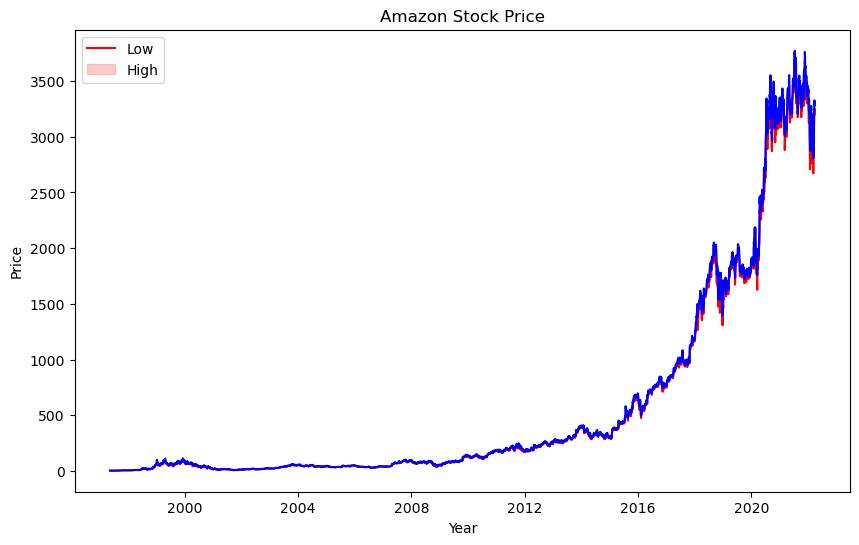

In [14]:
plt.figure(figsize = (10, 6))

sns.lineplot(data = AMZN, 
             x = 'Date', 
             y = 'Low',
             color = 'red')

sns.lineplot(data = AMZN, 
             x = 'Date', 
             y = 'High', 
             color = 'blue')

plt.ylabel('Price')
plt.xlabel('Year')
plt.title('Amazon Stock Price')
plt.legend(labels = ['Low', 'High'])

###  Automating Stock Data Download

In [30]:
import yfinance as yf
from pandas_datareader import data as pdr

# Only get the adjusted close.
yf.pdr_override()
netflix = pdr.get_data_yahoo("NFLX", 
                       start='2009-1-1', 
                       end='2021-3-10')

nf = pd.DataFrame(netflix)['Adj Close']
nf.head()

# nf.info()
#nf.to_csv('netflix.csv')

[*********************100%%**********************]  1 of 1 completed


Date
2009-01-02    4.267143
2009-01-05    4.562857
2009-01-06    4.705714
2009-01-07    4.672857
2009-01-08    4.735714
Name: Adj Close, dtype: float64

## 7.2 Interactive EDA for Time Series

### 7.2.1 Read and Prepare the data

In [14]:
# read the dataset

jetrail = pd.read_csv('JetRail.csv')
jetrail.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [15]:
# drop the ID column (not needed)

jetrail.drop('ID', axis = 1, inplace = True)

In [16]:
jetrail.dtypes

Datetime    object
Count        int64
dtype: object

In [17]:
# Cast the the date/time object to be a pandas datetime object and use it as an index
jetrail.index = pd.to_datetime(jetrail.Datetime, format = '%d-%m-%Y %H:%M')

In [18]:
# delete the date column (since it is now an index for the dataframe)
jetrail.drop('Datetime', axis = 1, inplace = True)

In [19]:
jetrail.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


### 7.2.2 Visualizing the time series using Plotly

In [20]:
fig = px.line(x = jetrail.index,
        y = jetrail['Count'],
        labels= {'y': 'Number of Passengers'},
        width = 800, height= 500)

fig.update_xaxes(rangeslider_visible = True)
fig.show()


In [21]:
daily_jetrail = jetrail[['Count']].resample('D').sum()

In [22]:
fig = px.line(x = daily_jetrail.index, 
        y = daily_jetrail['Count'],
        labels = {'y': 'Number of Passengers'}, 
        width = 800, height = 500)
fig.update_xaxes(rangeslider_visible = True)
fig.show()

### 7.2.3 Time Series Feature Extraction

In [23]:
jetrail['Year'] = jetrail.index.year
jetrail['Month'] = jetrail.index.month
jetrail['Day'] = jetrail.index.day
jetrail['Hour'] = jetrail.index.hour

In [24]:
jetrail.head()

,Count,Year,Month,Day,Hour
Datetime,,,,,
2012-08-25 00:00:00,8,2012,8,25,0
2012-08-25 01:00:00,2,2012,8,25,1
2012-08-25 02:00:00,6,2012,8,25,2
2012-08-25 03:00:00,2,2012,8,25,3
2012-08-25 04:00:00,2,2012,8,25,4


### 7.2.4 Exploratory Data Analysis

We are interested in visually assessing the following hypothesis: 

- Traffic increases as the years pass by
- Traffic decreases in weekends
- Traffic increases in May to October period 
- Traffic is highest during th peak hours

In [25]:
# Hypothesis 1: Does traffic increases as the years pass by?

df = jetrail.groupby('Year')[['Count']].sum()

fig = px.bar(df, 
            x = df.index, 
            y = df.Count,
            width = 800, height = 500)
fig.update_layout(title = 'Annual total # of Passengers',
                  xaxis_type='category',
                  plot_bgcolor='rgba(0,0,0,0)')




In [27]:
# Hypothesis 2: Is traffice more on weekdays?

# prepare the data  
jetrail['Day of Week'] = jetrail.index.day_of_week
df = jetrail.groupby('Day of Week')[['Count']].sum()

# plot the data 
fig = px.bar(df, 
            x = df.index, 
            y = df.Count,
            width = 800, height = 500)
fig.update_layout(title = 'Days of the week',
                  xaxis_title = '',
                  yaxis_title = "Count of Riders",
                  xaxis_type='category',
                  xaxis = dict(
                      tickvals=[0,1,2,3,4,5,6],
                      ticktext = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']),
                   plot_bgcolor='rgba(0,0,0,0)')

In [28]:
# Hypothesis 2 (revisited): Is traffice more on weekdays?

# prepare the data 
jetrail['Weekend'] = ['Weekend' if i in (5,6) else 'Weekday' for i in jetrail['Day of Week']]
df = jetrail.groupby('Weekend')[['Count']].sum()
df['percent_share'] = df['Count'].div(df['Count'].sum()).mul(100)

In [29]:
df.head()

,Count,percent_share
Weekend,,
Weekday,2053298,80.798232
Weekend,487968,19.201768


In [33]:
#weekend vs. weekday
fig = px.bar(df, 
            x = df.index, 
            y = df.percent_share,
            width = 800, height = 500)

fig.update_layout(title = 'Days of the week',
                  xaxis_title = '',
                  yaxis_title = "% of Ridership",
                   plot_bgcolor='rgba(0,0,0,0)')

In [36]:
# Hypothesis 3: Do we have increase in traffic from May to October?

df = jetrail.groupby('Month')[['Count']].sum()

fig = px.bar(df, 
             x = df.index, 
             y = df.Count,
             width = 800, height = 500)
fig.update_layout(title = 'Monthly total # of Passengers',
                  xaxis_type='category',
                  plot_bgcolor='rgba(0,0,0,0)')

In [41]:
# We see a decrease in the total of passenger count in the last three months. 
# This does not look right. Let's look at the monthly total of each year separately.

# Create a pivot table/Cross tab for the heatmap which shows 
# the number of passangers for each month for each year

df = pd.crosstab(index = jetrail.Year, 
                 columns = jetrail.Month, 
                 values = jetrail.Count, 
                 aggfunc= np.sum)

df

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,496.0,3200.0,8174.0,11396.0,11666.0
2013,13712.0,14912.0,17550.0,24772.0,33936.0,41280.0,55642.0,74502.0,86936.0,104110.0,101520.0,117096.0
2014,124400.0,134536.0,136892.0,173488.0,196786.0,227602.0,255456.0,290146.0,281060.0,NaN,NaN,NaN


In [50]:
import plotly.graph_objects as go 

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = df.columns,
        y = df.index,
        z = df.values,
        colorscale = 'Greens', # try 'YlGn' for color
        hovertemplate = 'Riders:%{z}', # update the text shown upon hovering 
        name = '' # get rid of the trace name
    )
)

fig.update_layout(
    title_text = 'Passenger Count Heatmap',
    xaxis_type = 'category',
    yaxis_type = 'category',
    xaxis = dict(
            tickvals=[1,2,3,4,5,6,7,8,9,10,11,12],
            ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),
        plot_bgcolor='rgba(0,0,0,0)'    
)

In [56]:
#Hypothesis 4: rush hours have the highest count for ridership

# Let's just focus on 2013, since we have complete data

df = pd.crosstab(index = jetrail.loc[jetrail.Year == 2013,'Hour'], 
                 columns = jetrail.loc[jetrail.Year == 2013,'Day'], 
                 values = jetrail.loc[jetrail.Year == 2013,'Count'], 
                 aggfunc= np.sum)

df.head()

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,936,976,904,1082,1006,1116,970,1008,1018,956,...,1120,1222,1000,1092,1060,1010,1066,1006,1160,668
1,768,688,726,850,792,862,712,702,658,694,...,904,920,826,808,750,866,864,806,814,570
2,568,634,694,648,710,700,584,542,600,628,...,812,710,722,658,712,708,750,626,738,500
3,472,624,488,504,530,646,486,474,444,490,...,576,544,638,494,610,598,574,488,538,348
4,340,480,406,430,822,504,402,376,402,394,...,572,500,530,432,430,452,428,454,452,340


In [57]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = df.columns, 
        y = df.index, 
        z = df.values, 
        colorscale = 'YlGn',
        hovertemplate = 'Riders:%{z}',
        name = '')
)

fig.update_layout(title_text = 'Passenger Count Heatmap for 2013',
                  xaxis_title = 'Day',
                  yaxis_title = 'Hour',
                  xaxis_type='category', 
                  yaxis_type = 'category',
                  height = 800,
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()

## 7.3 Handeling Missing Values

In [ ]:
# consider the following dataset generated randomly

import random
random.seed(1000) # set a seed to get similar answers

ID = range(1, 151) # list of ids (1-150)
age = random.choices(range(20, 35), k = 150)
job = random.choices(['Data Scientist', 'Data Analyst', 'Data Engineer'], k = 150)

# inject some missing age values for observations with index 3, 20, 33, 75, and 80
for i in [3, 20, 33, 75, 80]:
    age[i] = np.NaN

# inject some missing job values for observations with index 4, 22, 55, 67, 99, 111, 119, 130, 140
for i in [4, 22, 55, 67, 99, 111, 119, 130, 140]:
    job[i] = np.NaN
    
# create a dataframe 


df = pd.DataFrame({ 'ID': ID, 
               'Age': age,
               'Job': job
    })

df.head()

,ID,Age,Job
0,1,31.0,Data Analyst
1,2,30.0,Data Engineer
2,3,21.0,Data Engineer
3,4,NaN,Data Engineer
4,5,27.0,NaN


### 7.3.1 Idenifying Missing Values

In [ ]:
# How many missing values in df?

pd.isnull(df).sum()

ID     0
Age    5
Job    9
dtype: int64

In [ ]:
# How many are not missing values in df2?
pd.notnull(df).sum()

ID     150
Age    145
Job    141
dtype: int64

In [ ]:
# let's create a barchart with the percentage of missing values per variables

missing_data = round(df.isnull().mean()*100)
missing_data

ID     0.0
Age    3.0
Job    6.0
dtype: float64

<AxesSubplot:>

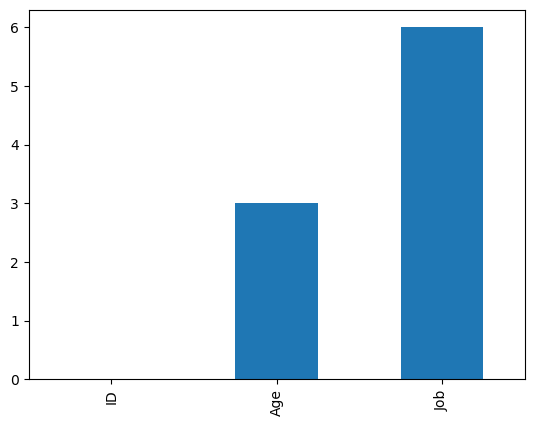

In [ ]:
missing_data.plot.bar()

### 7.3.2 Dealing with Missing Values

There are a lot of ways to handle missing values, but in this course we will focus on:

- Dropping observations with missing values
- Replacing missing values for numeric variables with the mean or median
- Replacing missing values for categorical variables with the mode

#### Dropping Observations with Missing Values

In [ ]:
df1 = df.dropna()

df1.isna().sum()

ID     0
Age    0
Job    0
dtype: int64

In [ ]:
df.shape

(150, 3)

In [ ]:
df1.shape # 14 observations has missing values

(136, 3)

#### Replacing missing values for numeric variables with the mean or median

In [ ]:
df.fillna(9999999) # replace all occurance of missing values in the data with 999999

,ID,Age,Job
0,1,31.0,Data Analyst
1,2,30.0,Data Engineer
2,3,21.0,Data Engineer
3,4,9999999.0,Data Engineer
4,5,27.0,9999999
...,...,...,...
145,146,22.0,Data Analyst
146,147,28.0,Data Scientist
147,148,33.0,Data Scientist
148,149,22.0,Data Scientist


In [ ]:
# what is the mean of age?

df['Age'].mean()

27.43448275862069

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df

,ID,Age,Job
0,1,31.000000,Data Analyst
1,2,30.000000,Data Engineer
2,3,21.000000,Data Engineer
3,4,27.434483,Data Engineer
4,5,27.000000,NaN
...,...,...,...
145,146,22.000000,Data Analyst
146,147,28.000000,Data Scientist
147,148,33.000000,Data Scientist
148,149,22.000000,Data Scientist


#### Replacing missing values for categorical variables with the mode

In [ ]:
# what is the mode of Job?

df['Job'].mode()

0    Data Analyst
dtype: object

In [ ]:
type(df['Job'].mode())

pandas.core.series.Series

In [ ]:
df['Job'].mode()[0]

'Data Analyst'

In [ ]:
df['Job'] = df['Job'].fillna(df['Job'].mode()[0])
df['Job']

0        Data Analyst
1       Data Engineer
2       Data Engineer
3       Data Engineer
4        Data Analyst
            ...      
145      Data Analyst
146    Data Scientist
147    Data Scientist
148    Data Scientist
149     Data Engineer
Name: Job, Length: 150, dtype: object

In [ ]:
df.isna().sum()

ID     0
Age    0
Job    0
dtype: int64

In [ ]:
df.shape

(150, 3)